In [1]:
import os.path as osp
import os 
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Path for current Tests

In [2]:
rootfrags = osp.abspath('Residues.ipynb').split("\\")
root = ""
for d in rootfrags:
    if d == "FieldNBalance":
        break
    else:
        root += d + "\\"
inPath = osp.join(root,"FieldNBalance","TestComponents", "TestSets", "Residues","Outputs")
outPath = osp.join(root,"FieldNBalance","TestGraphs", "Outputs")  

Get names and results from each test

In [3]:
testFiles = []
tests = []
for file in os.listdir(inPath):
    if file.endswith('.csv'):
        testFiles.append(file)
        tests.append(file.replace(".csv",""))

Pack tests up into dataframe for graphing

In [5]:
Alltests =[]
for t in testFiles[:]:  
    testframe = pd.read_csv(osp.join(inPath, t),index_col=0,dayfirst=True,date_format='%d/%m/%Y %H:%M:%S %p')  
    Alltests.append(testframe)   

AllData = pd.concat(Alltests,axis=1,keys=tests)
AllData.sort_index(axis=0,inplace=True)
AllData.index = pd.to_datetime(AllData.index)

Make graph

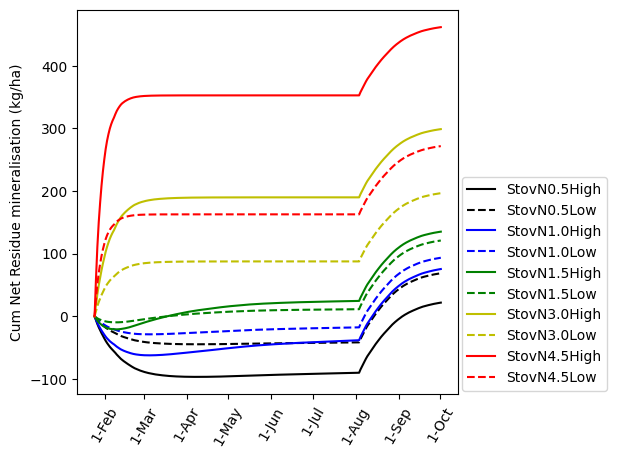

In [6]:
cols = ['k','k','b','b','g','g','y','y','r','r']
lines = ['-','--','-','--','-','--','-','--','-','--',]

Graph = plt.figure()
ax = Graph.add_subplot(1,1,1)
pos = 0
for t in tests:
    plt.plot(AllData.loc[:,(t,'ResidueN')].cumsum(),lines[pos],color=cols[pos],label = t)
    pos +=1
plt.legend(loc=(1.01,0.01))
plt.ylabel('Cum Net Residue mineralisation (kg/ha)')
plt.xticks(rotation=60)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
Graph.tight_layout(pad=1.5)
plt.savefig(osp.join(outPath, 'Residues.png'))